# **Import library**

 ---

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

* Library matplotlib di gunakan untuk membuat visualisasi
* Library panda digunakan untuk membaca data yang banyak dan digunakan untuk membuat tabel data
* Library numpy diguanakan untuk membantu perhitungan yang rumit dan visualisasi

# **Runge-Kutta**

 ---


**Sumber:https://jurnal.yalamqa.com/index.php/aqlu/article/view/99**



## **Pembahasan**

>$\frac{dP(t)}{dt}=m(1-\frac{P(t)}{K})P(t)$

>Formula orde-4: $ P_{i+1} = P_i + \frac{25}{216}k_1 + \frac{1408}{2565}k_3 + \frac{2197}{4104}k_4 - \frac{1}{5}k_5 $
>
>Formula orde-5: $ \hat{P}_{i+1} = P_i + \frac{16}{135}k_1 + \frac{6656}{12825}k_3 + \frac{28561}{56430}k_4 - \frac{9}{50}k_5 + \frac{2}{55}k_6 \$


>Dengan $ k_1 = hf(t_i, P_i)  $ dan $ k_n = hf(t_i + a_n h, P(t)_i + \sum_{m=1}^{n-1} b_{nm} k_m) ,  n = 2, \ldots, 6 $
>
>Keterangan:
> - $ t_i $ dan $ P(t)_i $ : Nilai awal
>
> - $ i $ : 0, 1, 2,......, \( N - 1 \)
>
> - $N $: Banyak langkah atau iterasi
>
> - $ h $ : Ukuran langkah
>
> - $ a_n $ dan $ b_{nm} $ : Koefisien dari metode RKF 45


### **Langkah 1: Data yang diperoleh dari Badan Pusat Statistik (BPS) Provinsi Sulawesi Barat**
>Berdasarkan data dari Badan Pusat Statistik (BPS) Provinsi Sulawesi Barat luas wilayah Sulawesi
Barat mengikuti keputusan Menteri Dalam negeri Nomor 100.1.1-6117 Tahun 2022 yaitu 16.594,75 km2
.
>
>Penduduk Provinsi Sulawesi Barat tahun 2020 berdasarkan hasil sensus penduduk sebanyak 1.419.229
jiwa. Laju pertumbuhan penduduk pertahun tercatat 1,98 persen atau 0,0198 dengan kepadatan penduduk
126 jiwa/km2
.
>
>Untuk menentukan kapasitas daya tampung digunakan rumus sebagai berikut:
>
>𝐾 = Luas daerah × Kepadatan penduduk
>
> = 16.594,75 𝑘𝑚2 × 126 jiwa/𝑘𝑚2
>
>= 2.090.938,5 jiwa
>
>𝐾 ≈ 2.090.939 jiwa

In [ ]:
Luas_daerah = float(16_594.75)
Kepadatan_penduduk = float(126)
K = Luas_daerah * Kepadatan_penduduk
print(K)

2090938.5


### **Langkah 2: Menentukan nilai fungsi dari persamaan logistik**

>Nilai-nilai dari langkah 1 disubitusikan ke persamaan logistik
>
>
>
>$$
\frac{dP}{dt} = m \left(1 - \frac{P(t)}{K}\right) P(t)
$$
>
>
>
>
>$$
f(t_i, P_i) = 0.0198 \left(1 - \frac{P(t_i)}{2.090.939}\right) P(t_i)
$$
>
>Pada iterasi pertama, interval waktu atau jarak langkah yang digunakan yaitu $ h = 0,01 $ (Yenci & Lutfi, 2022). Kemudian nilai awal $ P(t_0) = 1.419.229 $.


In [ ]:
# Parameter awal
m = 0.0198
K = 2090939
h = 0.01
P0 = 1419229
t0 = 0
t_end = 1  # durasi waktu simulasi dalam satuan yang sama dengan t

# Fungsi logistik
fungsi_logistik = lambda P, t: (m * (1 - P / K) * P)
print(f"fungsi logistik: {fungsi_logistik(P0, t0)}")


fungsi logistik: 9027.305038301933


### **Langkah 3:** Melakukan perhitungan dengan metode Runge Kutta Fehlberg orde 4 dan orde 5 untuk mendapatkan solusi numerik pada persamaan logistik.

>Pada iterasi pertama, interval waktu atau jarak langkah yang digunakan yaitu $h = 0.01$. Kemudian diberikan $P(t_0) = 1.419.229$ dan $t_0 = 0$ tahun sebagai nilai awal sehingga diperoleh hasil penyelesaian numerik model persamaan logistik menggunakan metode Runge Kutta Fehlberg (RKF 45) sebagaimana pada persamaan berikut:
>
>$$
P_{0+1} = P_0 + \frac{25}{216}k_1 + \frac{1408}{2565}k_3 + \frac{2197}{4104}k_4 - \frac{1}{5}k_5
$$
>
>$$
\hat{P}_{0+1} = P_0 + \frac{16}{135}k_1 + \frac{6656}{12825}k_3 + \frac{28561}{56430}k_4 - \frac{9}{50}k_5 + \frac{2}{55}k_6
$$
>
>$$
t_1 = t_0 + ih
$$


>Dengan:
>
>Mencari K1:
>$$ k_1 = hf(t_0, P_0) $$
>
>$$= h \times \left( m \left( 1 - \frac{P_0}{K} \right) P_0 \right) $$






In [ ]:
K1 = round(h * (m * (1-(P0/K)) * P0), 5)
print(f"K1: {K1}")

K1: 90.27305


>Mencari K2:
>
>$$
>k_2 = hf \left( t_0 + \frac{1}{4}h, P_0 + \frac{1}{4}k_1 \right)
>$$
>
>
>
>
>
>$$
>= h \times \left( m \left( 1 - \frac{P_0 + \frac{1}{4}k_1}{K} \right) \left( P_0 + \frac{1}{4}k_1 \right) \right)
>$$
>
>lakukan sedikit manipulasi pada rumus:
>
>$$
>= h \times \left( m \left( 1 - \frac{P}{K} \right) P \right)
>$$
>
>

In [ ]:
K2 = round(h * (m * (1-(P0+K1/4)/K) * (P0+K1/4)), 5)
print(f"K2: {K2}")

K2: 90.27145


>Mencari K3:
>
>$$
>k_3 = h f \left( t_0 + \frac{3}{8} h, P_0 + \frac{3}{32} k_1 + \frac{9}{32} k_2 \right)
>$$
>
>$$
>= h \times \left( m \left( 1 - \frac{P_0 + \frac{3}{32} k_1 + \frac{9}{32} k_2}{K} \right)  P_0 + \frac{3}{32} k_1 + \frac{9}{32} k_2 \right)
>$$
>
>lakukan sedikit manipulasi pada rumus:
>
>$$
>= h \times \left( m \left( 1 - \frac{P}{K} \right)  P \right)
>$$
>
>

In [ ]:
P = P0 + ((3/32)*K1) + ((9/32)*K2)
K3 = round(h * (m * (1-(P/K))*P), 5)
print(f"K3: {K3}")

K3: 90.27065


>Mencari K4:
>
>$$
>k_4 = hf \left( t_0 + \frac{12}{13}h, P_0 + \frac{1932}{2197}k_1 - \frac{7200}{2197}k_2 + \frac{7296}{2197}k_3 \right)
>$$
>
>
>
>
>$$
>= h \times \left( m \left( 1 - \frac{P_0 + \frac{1932}{2197}k_1 - \frac{7200}{2197}k_2 + \frac{7296}{2197}k_3}{K} \right) P_0 + \frac{1932}{2197}k_1 - \frac{7200}{2197}k_2 + \frac{7296}{2197}k_3 \right)
>$$
>
>lakukan sedikit manipulasi pada rumus:
>
>$$
>= h \times \left( m \left( 1 - \frac{P}{K} \right)  P \right)
>$$
>

In [ ]:
P = P0+((1932/2197)*K1)-((7200/2197)*K2)+((7296/2197)*K3)
K4 = round(h * (m * (1-(P/K))*P), 5)
print(f"K4:{K4}")

K4:90.26715


>Mencari K5:
>
>$$
>k_5 = hf \left( t_0 + h, P_0 + \frac{439}{216}k_1 - 8k_2 + \frac{3680}{513}k_3 - \frac{845}{4101}k_4 \right)
>$$
>
>
>
>
>
>$$
>= h \times \left( m \left( 1 - \frac{P_0 + \frac{439}{216}k_1 - 8k_2 + \frac{3680}{513}k_3 - \frac{845}{4101}k_4}{K} \right) P_0 + \frac{439}{216}k_1 - 8k_2 + \frac{3680}{513}k_3 - \frac{845}{4101}k_4 \right)
>$$
>
>lakukan sedikit manipulasi pada rumus:
>
>$$
>= h \times \left( m \left( 1 - \frac{P}{K} \right)  P \right)
>$$
>

In [ ]:
P = P0+((439/216)*K1)-(8*K2)+((3680/513)*K3)-((845/4101)*K4)
K5 = round(h * (m * (1-(P/K))*P), 5)
print(f"K5: {K5}")

K5: 90.26666


>Mencari K6:
>
>$$
>k_6 = hf \left( t_0 + \frac{1}{2}h, P_0 - \frac{8}{27}k_1 + 2k_2 - \frac{3544}{2565}k_3 + \frac{1859}{4104}k_4 - \frac{11}{40}k_5 \right)
>$$
>
>
>
>
>
>$$
>= h \times \left( m \left( 1 - \frac{P_0 - \frac{8}{27}k_1 + 2k_2 - \frac{3544}{2565}k_3 + \frac{1859}{4104}k_4 - \frac{11}{40}k_5}{K} \right)  P_0 - \frac{8}{27}k_1 + 2k_2 - \frac{3544}{2565}k_3 + \frac{1859}{4104}k_4 - \frac{11}{40}k_5 \right)
>$$
>
>
>
>lakukan sedikit manipulasi pada rumus:
>
>$$
>= h \times \left( m \left( 1 - \frac{P}{K} \right)  P \right)
>$$

In [ ]:
P = P0 - ((8/27)*K1)+(2*K2)-((3544/2565)*K3)+((1859/4104)*K4)-((11/40)*K5)
K6 = round(h * (m * (1-(P/K))*P), 5)
print(f"K6: {K6}")

K6: 90.26986


>Kemudian mensubtitusiakan nilai dari fungsi evaluasi $ k_1 $ sampai $ k_6 $ ke formulasi orde 4 maka akan diperoleh hasil dari solusi numerik pada model persamaan logistik menggunakan metode RKF orde 4 sebagai berikut:
>
>
>
>$$ P_{0+1} = P_0 + \frac{25}{216} k_1 + \frac{1408}{2565} k_3 + \frac{2197}{4104} k_4 - \frac{1}{5} k_5 $$
>
>
>
>
>
>$$P_1 = P_0 + \frac{25}{216} k_1 + \frac{1408}{2565} k_3 + \frac{2197}{4104} k_4 - \frac{1}{5} k_5 $$
>
>
>
>
>
>$$P_1 = 1.419.229 + \frac{25}{216} (90,27305) + \frac{1408}{2565} (90,27065) + \frac{2197}{4104} (90,26715) - \frac{1}{5} (90,26666) $$
>
>
>
>
>
>$$P_1 = 1.419.319,26985 $$
>
>
>
>Jadi pada waktu
>
>
>
>$$ t_1 = t_0 + h $$
>
>
>
>
>$$ = 0 + 0,01 $$
>
>
>
>
>$$ = 0,01 $$
>
>
>
>Diperoleh $$ P(t_1) = 1.419.319 $$


**Buat Fungsi untuk menghitung $P_{0+1}$**

In [ ]:
def rkf45_step(P, t, h, fungsi_logistik):
    # Hitung k1, k2, k3, k4, k5, dan k6


    # Hitung P pada langkah berikutnya menggunakan rumus orde 4
    P_next = round(P + (25 * K1 / 216) + (1408 * K3 / 2565) + (2197 * K4 / 4104) - (K5 / 5), 0)

    return P_next

>kemudian untuk iterasi selanjutnya dilakukan hal yang sama hingga iterasi ke-1000 atau akan memprediksi pertumbuhan penduduk untuk 10 tahun kedepan yaitu pada Tabel 1.
>

In [ ]:
# Inisialisasi variabel
P = P0  # Populasi awal
t = t0  # Waktu awal
results = [(t, P)]  # Menyimpan hasil setiap iterasi

# Lakukan iterasi
for i in range(1000):
    P = rkf45_step(P, t, h, fungsi_logistik)
    t += round(h, 2)
    results.append((t, P))

df = pd.DataFrame(results, columns=['Waktu (tahun)', 'Populasi'])
print(df)

      Waktu (tahun)   Populasi
0              0.00  1419229.0
1              0.01  1419319.0
2              0.02  1419409.0
3              0.03  1419499.0
4              0.04  1419589.0
...             ...        ...
996            9.96  1508869.0
997            9.97  1508959.0
998            9.98  1509049.0
999            9.99  1509139.0
1000          10.00  1509229.0

[1001 rows x 2 columns]


>
>Selanjutnya mensubtitusi nilai dari fungsi evaluasi $ k_1 $ sampai $ k_6 $ ke formulasi orde 5 untuk memperoleh hasil dari solusi numerik pada model persamaan logistik menggunakan metode RKF orde 5 sebagai berikut:
>
>
>
>$$ \hat{P}_{0+1} = P_0 + \frac{16}{135} k_1 + \frac{6656}{12825} k_3 + \frac{28561}{56430} k_4 - \frac{9}{50} k_5 + \frac{2}{55} k_6 $$
>
>
>
>
>
>$$ \hat{P}_1 = P_0 + \frac{16}{135} k_1 + \frac{6656}{12825} k_3 + \frac{28561}{56430} k_4 - \frac{9}{50} k_5 + \frac{2}{55} k_6 $$
>
>
>
>
>
>$$ \hat{P}_1 = 1.419.229 + \frac{16}{135} (90,27305) + \frac{6656}{12825} (90,27065) + \frac{28561}{56430} (90,26715) - \frac{9}{50} (90,26666) + \frac{2}{55} (90,26986) $$
>
>
>
>
>
>$$\hat{P}_1 = 1.419.319,26985 $$
>
>
>
>

**Buat Fungsi untuk menghitung $\hat P_{0+1}$**

In [ ]:
def rkf45_step_hat(P, t, h, fungsi_logistik):
    # Hitung k1, k2, k3, k4, k5, dan k6


    # Hitung P pada langkah berikutnya menggunakan rumus orde 4
    P_next = round(P + (16*K1/135)+ (6656*K3/12825)+(28561*K4/56430)-(9*K5/50)+(2*K6/55), 0)

    return P_next

>Jadi pada waktu $ t = 0.01 $ diperoleh $\hat{P}_1 = 1.419.319 $ jiwa kemudian untuk iterasi selanjutnya dilakukan hal yang sama hingga iterasi ke-1000 atau akan memprediksi pertumbuhan penduduk untuk 10 tahun ke depan dengan menggunakan program R-Studio yaitu pada Tabel 2.


In [ ]:
# Inisialisasi variabel
P = P0  # Populasi awal
t = t0  # Waktu awal
results = [(t, P)]  # Menyimpan hasil setiap iterasi

# Lakukan iterasi
for i in range(1000):
    P = rkf45_step_hat(P, t, h, fungsi_logistik)
    t += round(h, 2)
    results.append((t, P))

df = pd.DataFrame(results, columns=['Waktu (tahun)', 'Populasi'])
print(df)

      Waktu (tahun)   Populasi
0              0.00  1419229.0
1              0.01  1419319.0
2              0.02  1419409.0
3              0.03  1419499.0
4              0.04  1419589.0
...             ...        ...
996            9.96  1508869.0
997            9.97  1508959.0
998            9.98  1509049.0
999            9.99  1509139.0
1000          10.00  1509229.0

[1001 rows x 2 columns]


      Waktu (tahun)   Populasi
0              0.00  1419229.0
1              0.01  1419319.0
2              0.02  1419409.0
3              0.03  1419499.0
4              0.04  1419589.0
...             ...        ...
7460          74.60  2090629.0
7461          74.61  2090719.0
7462          74.62  2090809.0
7463          74.63  2090899.0
7464          74.64  2090989.0

[7465 rows x 2 columns]


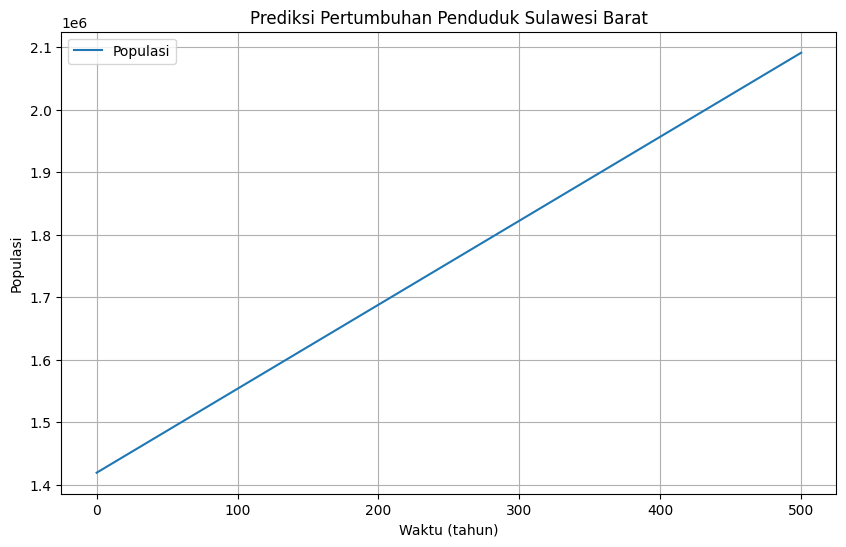

In [ ]:
# Inisialisasi variabel
P = P0  # Populasi awal
t = t0  # Waktu awal
results = [(t, P)]  # Menyimpan hasil setiap iterasi

# Lakukan iterasi
for i in range(50000):
  P = rkf45_step_hat(P, t, h, fungsi_logistik)
  t_current = round(t + h, 2) # Calculate current t for comparison
  results.append((t_current, P)) # store t_current
  if P >= K: #comparing t_current instead of array t
    P - 100
    break
  t = t_current # Update t for the next iteration

df = pd.DataFrame(results, columns=['Waktu (tahun)', 'Populasi'])
print(df)
# Create the plot
x = np.linspace(0, 500, df['Populasi'].size)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(x, df['Populasi'], label='Populasi')

# Customize the plot
plt.xlabel('Waktu (tahun)')
plt.ylabel('Populasi')
plt.title('Prediksi Pertumbuhan Penduduk Sulawesi Barat')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# **Fast Fourier Transform(FFT)**

## **Rumus Model Fast Fourier Transform (FFT)**




>FFT adalah algoritma yang efisien untuk menghitung Discrete Fourier Transform (DFT) dari suatu deret data. DFT didefinisikan sebagai:
>
>$$X(k) = \sum_{m=0}^{n-1} x_m e^{-i2πkm/n}\qquad k=0,…,n-1,$$
>
>di mana:
>* $X(k)$: Ini adalah komponen spektrum frekuensi dari sinyal waktu $x_m$. Nilai ini menunjukkan amplitudo dan fase dari frekuensi $k$ dalam sinyal asli.
>* $\sum_{m=0}^{n-1}$ : Ini adalah notasi sumasi yang menunjukkan bahwa kita menjumlahkan semua nilai dari $m = 0$ hingga $m = n-1$.
>* $x_m$ : Ini adalah nilai sinyal asli pada titik waktu ke-𝑚.
>* $e^{-i2πkm/n}$ : Ini adalah ekspresi eksponensial kompleks yang digunakan untuk mengubah sinyal dari domain waktu ke domain frekuensi. Notasi ini berasal dari formula Euler dan merupakan bagian dari transformasi Fourier.
>* $i$: Ini adalah unit imajiner, di mana $i^2= -1$.
>* $2π$: Ini adalah konstanta yang terkait dengan periodisitas fungsi sinus dan cosinus dalam transformasi Fourier.
>* $k$: Ini adalah indeks frekuensi yang menunjukkan frekuensi ke-$k$ dalam sinyal. Nilai $k$ berkisar dari $0$ hingga $n-1$.
>* $m$: Ini adalah indeks waktu yang menunjukkan titik waktu ke-$m$ dalam sinyal asli. Nilai $m$ berkisar dari $0$ hingga $n-1$.
>
>* $n$: Ini adalah panjang atau jumlah sampel dalam sinyal asli.
>
>### Radix-2 Cooley-Tukey Fast Fourier Transform (FFT)
>
>Radix-2 Cooley-Tukey adalah algoritma Fast Fourier Transform (FFT) yang paling umum digunakan. Algoritma ini mengubah sinyal dari domain waktu ke domain frekuensi, memungkinkan analisis spektrum frekuensi dari sinyal tersebut. Berikut adalah langkah-langkah dan konsep dasar dari algoritma Radix-2 Cooley-Tukey:
>
> **Prinsip Dasar**
>Algoritma Radix-2 Cooley-Tukey memecah transformasi Fourier dari sinyal panjang $ N$ menjadi beberapa transformasi Fourier dari sinyal panjang yang lebih kecil. Ini dilakukan dengan cara rekursif hingga ukuran sinyal menjadi dua, yang merupakan transformasi Fourier paling sederhana.
>
> **Langkah-langkah Algoritma**
>1. **Pembagian dan Penaklukan**:
>   - Pisahkan sinyal waktu $x[n] $ yang panjangnya $ N $ menjadi dua bagian: sinyal bernomor genap dan sinyal bernomor ganjil.
>   - Hitung FFT untuk dua bagian tersebut secara rekursif.
>
>2. **Penggabungan**:
>   - Gabungkan hasil dari dua bagian tersebut untuk mendapatkan FFT dari sinyal asli. Penggabungan ini dilakukan menggunakan faktor kupu-kupu (butterfly) yang mengombinasikan hasil transformasi bagian genap dan ganjil dengan menggunakan ekspresi eksponensial kompleks.
>
>**Notasi Matematika**
>
>Transformasi Fourier diskret (DFT) dari sinyal $ x $ didefinisikan sebagai:
>
>
>$$ X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i \frac{2\pi}{N}kn} $$
>
>
>
>Dalam Radix-2 Cooley-Tukey, sinyal dipisahkan menjadi bagian genap dan ganjil:
>
>
>$$ X[k] = X_{\text{even}}[k] + e^{-i \frac{2\pi}{N}k} \cdot X_{\text{odd}}[k] $$
>
>
>
>Untuk $$ k = 0, 1, 2, ..., \frac{N}{2} - 1 $$, dan
>
>
>$$ X[k + \frac{N}{2}] = X_{\text{even}}[k] - e^{-i \frac{2\pi}{N}k} \cdot X_{\text{odd}}[k] $$
>
>
>
>**Kompleksitas Waktu**
>Algoritma Radix-2 Cooley-Tukey memiliki kompleksitas waktu $ O(N \log N) $, yang jauh lebih efisien dibandingkan dengan kompleksitas waktu $ O(N^2) $ dari transformasi Fourier diskret (DFT) langsung.
>
>### Implementasi dalam Python
>Berikut adalah contoh implementasi sederhana dari Radix-2 Cooley-Tukey FFT dalam Python:
>```python
>import numpy as np
>
>def fft(x):
>    N = len(x)
>    if N <= 1:
>        return x
>    even = fft(x[0::2])
>    odd = fft(x[1::2])
>    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
>    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]
>
># Contoh penggunaan
>x = np.random.random(8)
>X = fft(x)
>print("FFT:", X)
>

## **Contoh Penerapan**

>Suatu hari, di sebuah laboratorium di sebuah universitas ternama, seorang >mahasiswa bernama Rina sedang mempelajari sinyal dan sistem. Dosen Rina >memberikan tugas yang cukup menantang: mengimplementasikan algoritma Fast >Fourier Transform (FFT) menggunakan Python, tanpa menggunakan library >selain numpy.
>
>Untuk membantu Rina memahami konsep FFT lebih dalam, dosen memberikan >sebuah sinyal yang harus dia analisis. Sinyal tersebut diberikan oleh >persamaan berikut:
>
>$$x(t)= e^{0.05×t} ×tanh(2π5t)$$
>
>Rina harus menghitung FFT dari sinyal ini, di mana
>𝑡
> adalah array linspace dari 0 hingga 1, dengan 1024 titik. Tugas Rina adalah membuat fungsi fft(x) dalam Python yang mengimplementasikan algoritma FFT tanpa menggunakan library selain numpy dan matplotlib. Dan menggunakan sinyal tersebut sebagai contoh untuk menghitung hasil FFT-nya.


Langkah-langkah:

* Definisikan fungsi fft(x) yang mengimplementasikan algoritma FFT.
* Buat sinyal $𝑥(𝑡)$  menggunakan fungsi eksponensial dan fungsi tangen hiperbolik.

* Hitung FFT dari sinyal tersebut menggunakan fungsi fft(x).

* Plot sinyal asli dan hasil FFT untuk mengidentifikasi frekuensi dominan dalam sinyal.

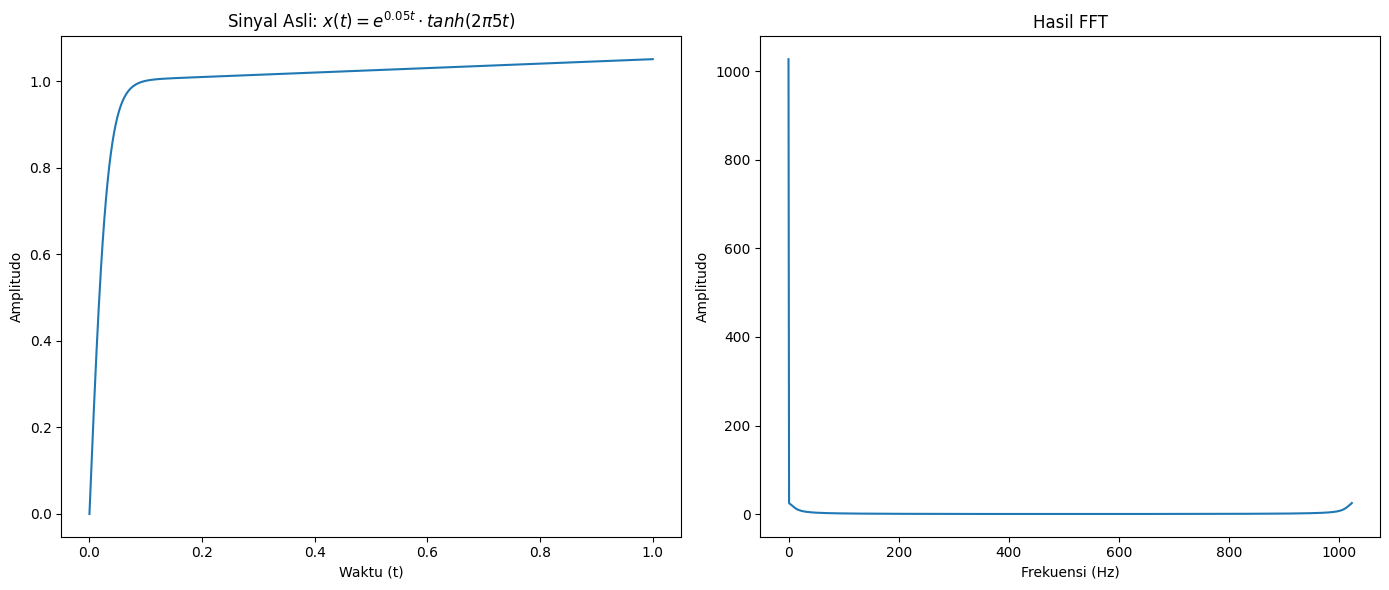

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    terms = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    return np.concatenate([even + terms * odd, even - terms * odd])

# Definisikan t dan x(t)
t = np.linspace(0, 1, 1024)  # Ubah 1000 menjadi 1024 untuk memastikan panjang array adalah pangkat dua
x_t = np.exp(0.05 * t) * np.tanh(2 * np.pi * 5 * t)

# Hitung FFT dari x(t)
X_f = fft(x_t)

# Visualisasikan sinyal asli dan hasil FFT
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x_t)
plt.title('Sinyal Asli: $x(t) = e^{0.05t} \\cdot tanh(2\\pi 5 t)$')
plt.xlabel('Waktu (t)')
plt.ylabel('Amplitudo')

plt.subplot(1, 2, 2)
plt.plot(np.abs(X_f))
plt.title('Hasil FFT')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')

plt.tight_layout()
plt.show()


# **Wavelete**

## **Wavelet Transform**


### Pengertian Dasar
Wavelet adalah fungsi matematika yang digunakan untuk mendekonstruksi dan menganalisis sinyal, memungkinkan pemrosesan data pada berbagai skala atau resolusi. Transformasi Wavelet mengubah sinyal dari domain waktu ke domain waktu-frekuensi, memberikan informasi tentang frekuensi lokal dan temporal.

### Keunggulan Wavelet
Tidak seperti Transformasi Fourier yang hanya memberikan informasi frekuensi global, Transformasi Wavelet mampu menangkap informasi frekuensi dan temporal secara lokal. Hal ini membuatnya sangat berguna untuk analisis sinyal yang memiliki karakteristik yang berubah seiring waktu.

### Fungsi Wavelet
Fungsi wavelet dasar (mother wavelet) adalah bentuk dasar yang digunakan untuk menghasilkan wavelet pada berbagai skala dan posisi. Contoh umum dari fungsi wavelet dasar adalah Haar, Daubechies, dan Morlet.

### Transformasi Wavelet Diskret (DWT)
DWT adalah metode numerik yang menggunakan wavelet untuk menganalisis sinyal dalam bentuk diskrit. DWT memecah sinyal menjadi dua bagian: koefisien aproksimasi (approximation coefficients) dan koefisien detail (detail coefficients), yang masing-masing memberikan informasi tentang sinyal pada skala rendah dan tinggi.

### Transformasi Wavelet Kontinu (CWT)
CWT adalah metode yang menggunakan wavelet untuk menganalisis sinyal dalam bentuk kontinu. CWT memberikan representasi kontinu dari sinyal dalam domain waktu-frekuensi dan sangat berguna untuk analisis sinyal yang tidak stasioner.

### Rumus Model Wavelet
Transformasi Wavelet Diskret (DWT) dari sinyal $ x[n] $ didefinisikan sebagai:


$$W_{j,k} = \sum_{n=0}^{N-1} x[n] \cdot \psi \left( \frac{n - k2^j}{2^j} \right) $$


di mana:
- $ W_{j,k} $ adalah koefisien wavelet pada skala $j $ dan posisi $ k $.
- $ x[n] $ adalah sinyal asli.
- $ \psi $ adalah fungsi wavelet dasar.
- $ j $ adalah skala wavelet.
- $ k $ adalah posisi wavelet.

Transformasi Wavelet Kontinu (CWT) dari sinyal $ x(t) $ didefinisikan sebagai:


$$ C(a, b) = \frac{1}{\sqrt{|a|}} \int_{-\infty}^{\infty} x(t) \cdot \psi \left( \frac{t - b}{a} \right) dt $$


di mana:
- $ C(a, b) $ adalah koefisien wavelet pada skala $ a $ dan posisi $ b $.
- $ x(t) $ adalah sinyal asli.
- $ \psi $ adalah fungsi wavelet dasar.
- $ a $ adalah skala wavelet (faktor penskalaan).
- $ b $ adalah posisi wavelet (faktor translasi).

### Implementasi dalam Python
Berikut adalah contoh implementasi sederhana dari Transformasi Wavelet Diskret (DWT) menggunakan pustaka `PyWavelets` di Python:
```python
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Sinyal contoh
x = np.linspace(0, 1, num=2048)
y = np.sin(2 * np.pi * 7 * x) + np.sin(2 * np.pi * 13 * x)

# Transformasi Wavelet Diskret
coeffs = pywt.wavedec(y, 'db1', level=6)

# Rekonstruksi sinyal dari koefisien
reconstructed_signal = pywt.waverec(coeffs, 'db1')

# Plot hasil
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y, label='Sinyal Asli')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(x, reconstructed_signal, label='Sinyal Rekonstruksi')
plt.legend()
plt.show()


## **Contoh Penerapan**

>Seorang ahli bioinformatika sedang menganalisis data genom untuk mendeteksi mutasi genetik yang berpotensi menyebabkan penyakit tertentu. Data genom ini dalam bentuk sinyal DNA yang terdiri dari urutan nukleotida. Untuk mengidentifikasi pola dan anomali dalam sinyal DNA, ia menggunakan transformasi wavelet.
>
>Sinyal DNA 𝑠(𝑡)dapat dinyatakan sebagai berikut:
>
>$𝑠(𝑡)=4cos⁡(2𝜋8𝑡)+3cos⁡(2𝜋30𝑡)$
>
>**Pertanyaan:**
>1. Gambarkan sinyal DNA 𝑠(𝑡)dalam domain waktu untuk interval $0 ≤ 𝑡 ≤ 1 $detik.
>
>2. Lakukan transformasi wavelet diskrit (DWT) pada sinyal $𝑠(𝑡)$ secara manual tanpa menggunakan library wavelet yang tersedia. Tampilkan koefisien wavelet yang diperoleh untuk satu level dekomposisi.



**1. Menggambar sinyal DNA 𝑠(𝑡)**

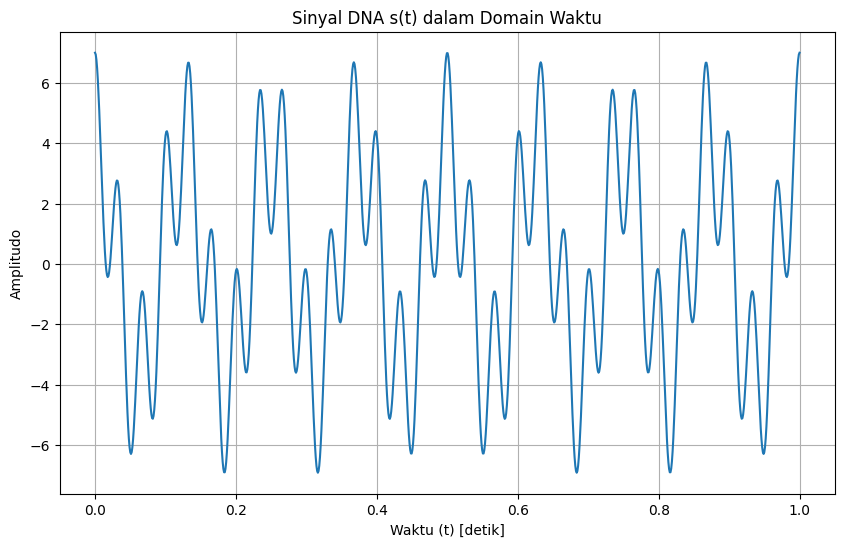

In [ ]:
# Definisikan sinyal DNA s(t)
def s(t):
    return 4 * np.cos(2 * np.pi * 8 * t) + 3 * np.cos(2 * np.pi * 30 * t)

# Buat array waktu t dari 0 hingga 1 detik
t = np.linspace(0, 1, 1000)
# Hitung nilai s(t)
s_t = s(t)

# Plot sinyal dalam domain waktu
plt.figure(figsize=(10, 6))
plt.plot(t, s_t)
plt.title('Sinyal DNA s(t) dalam Domain Waktu')
plt.xlabel('Waktu (t) [detik]')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()


**1. Transformasi wavelet diskrit (DWT)**

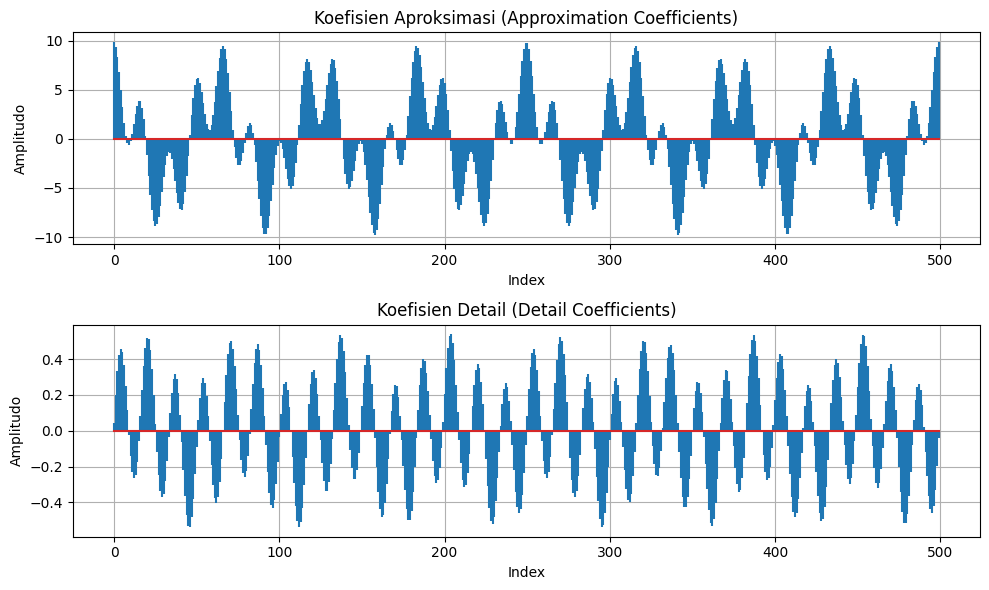

In [ ]:
# Fungsi untuk dekomposisi wavelet level 1
def haar_wavelet_transform(signal):
    N = len(signal)
    output = np.zeros(N)

    # Proses dekomposisi
    for i in range(0, N, 2):
        output[i//2] = (signal[i] + signal[i+1]) / np.sqrt(2)  # Approximation coefficients
        output[N//2 + i//2] = (signal[i] - signal[i+1]) / np.sqrt(2)  # Detail coefficients

    return output

# Lakukan DWT pada sinyal s(t)
dwt_coeffs = haar_wavelet_transform(s_t)

# Tampilkan koefisien wavelet yang diperoleh
approx_coeffs = dwt_coeffs[:len(dwt_coeffs)//2]
detail_coeffs = dwt_coeffs[len(dwt_coeffs)//2:]

# Plot koefisien wavelet
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
markerline, stemlines, baseline = plt.stem(approx_coeffs)
plt.setp(markerline, visible=False) #hide the marker
plt.title('Koefisien Aproksimasi (Approximation Coefficients)')
plt.xlabel('Index')
plt.ylabel('Amplitudo')
plt.grid(True)

plt.subplot(2, 1, 2)
markerline, stemlines, baseline = plt.stem(detail_coeffs)
plt.setp(markerline, visible=False) #hide the marker
plt.title('Koefisien Detail (Detail Coefficients)')
plt.xlabel('Index')
plt.ylabel('Amplitudo')
plt.grid(True)

plt.tight_layout()
plt.show()


# **Interpolasi Polinomial**

## Soal Interpolasi Polinomial

Seorang petani memiliki lahan pertanian yang luas dan ingin memaksimalkan hasil panennya. Dia memutuskan untuk melakukan penelitian terhadap berbagai jenis pupuk dan pengaruhnya terhadap hasil panen jagung. Dalam percobaannya, dia menggunakan empat jenis pupuk yang berbeda dan mengukur hasil panen jagung (dalam kuintal) yang dihasilkan per hektar untuk masing-masing jenis pupuk. Data hasil panen tersebut sebagai berikut:

| Pupuk (kg/ha) | 0   | 20  | 40  | 60  |
|---------------|-----|-----|-----|-----|
| Panen (kuintal) | 30  | 40  | 55  | 70  |

Petani tersebut ingin mengetahui hasil panen yang diharapkan jika dia menggunakan 30 kg/ha pupuk. Untuk itu, dia meminta bantuan seorang ahli matematika untuk menginterpolasi data yang ada menggunakan metode interpolasi polinomial.

### Pertanyaan:
1. Tentukan polinomial interpolasi yang melalui keempat titik data tersebut.
2. Gunakan polinomial interpolasi yang telah ditemukan untuk menghitung hasil panen yang diharapkan jika petani menggunakan 30 kg/ha pupuk.

### Penyelesaian:
1. Untuk menentukan polinomial interpolasi, kita dapat menggunakan metode Lagrange atau metode Newton. Dalam hal ini, kita akan menggunakan metode Newton untuk menemukan polinomial interpolasi yang melalui titik-titik data yang diberikan.
2. Setelah menemukan polinomial interpolasi, kita substitusi nilai \(x = 30\) kg/ha ke dalam polinomial tersebut untuk menghitung hasil panen yang diharapkan.

```python
import numpy as np

# Data yang diberikan
x = np.array([0, 20, 40, 60])
y = np.array([30, 40, 55, 70])

# Fungsi untuk menghitung koefisien Newton
def newton_coefficients(x, y):
    n = len(y)
    a = np.copy(y)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    return a

# Fungsi untuk menghitung nilai interpolasi Newton
def newton_interpolation(x_data, y_data, x):
    a = newton_coefficients(x_data, y_data)
    n = len(a) - 1
    p = a[n]
    for k in range(1, n + 1):
        p = a[n-k] + (x - x_data[n-k]) * p
    return p

# Mencari hasil panen untuk 30 kg/ha pupuk
x_new = 30
y_new = newton_interpolation(x, y, x_new)

print(f"Hasil panen yang diharapkan untuk 30 kg/ha pupuk adalah {y_new:.2f} kuintal")


In [ ]:
# Data yang diberikan
x = np.array([0, 20, 40, 60])
y = np.array([30, 40, 55, 70])

# Fungsi untuk menghitung koefisien Newton
def newton_coefficients(x, y):
    n = len(y)
    a = np.copy(y)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (x[i] - x[i-j])
    return a

# Fungsi untuk menghitung nilai interpolasi Newton
def newton_interpolation(x_data, y_data, x):
    a = newton_coefficients(x_data, y_data)
    n = len(a) - 1
    p = a[n]
    for k in range(1, n + 1):
        p = a[n-k] + (x - x_data[n-k]) * p
    return p

# Mencari hasil panen untuk 30 kg/ha pupuk
x_new = 30
y_new = newton_interpolation(x, y, x_new)

print(f"Hasil panen yang diharapkan untuk 30 kg/ha pupuk adalah {y_new:.2f} kuintal")


In [ ]:
# Fungsi interpolasi untuk berbagai nilai x
x_values = np.linspace(0, 60, 100)
y_values = [newton_interpolation(x, y, xi) for xi in x_values]

# Plot data asli
plt.scatter(x, y, color='red', label='Data Asli')
# Plot hasil interpolasi
plt.plot(x_values, y_values, label='Interpolasi Polinomial Newton')
# Plot titik interpolasi yang dicari
plt.scatter([x_new], [y_new], color='blue', label='Interpolasi pada 30 kg/ha')

plt.title('Interpolasi Polinomial Newton')
plt.xlabel('Pupuk (kg/ha)')
plt.ylabel('Panen (kuintal)')
plt.legend()
plt.grid(True)
plt.show()


#**REGRESI LINEAR**

**Sumber:**
**https://jurnal.desantapublisher.com/index.php/desanta/article/download/336/267**

**PEMODELAN REGRESI LINEAR UNTUK MEMPREDIKSI
NILAI PENJUALAN DI PT GOODIEBAG CUSTOM
INDONESIA TANPA MEMPERTIMBANGKAN UJI ASUMSI**

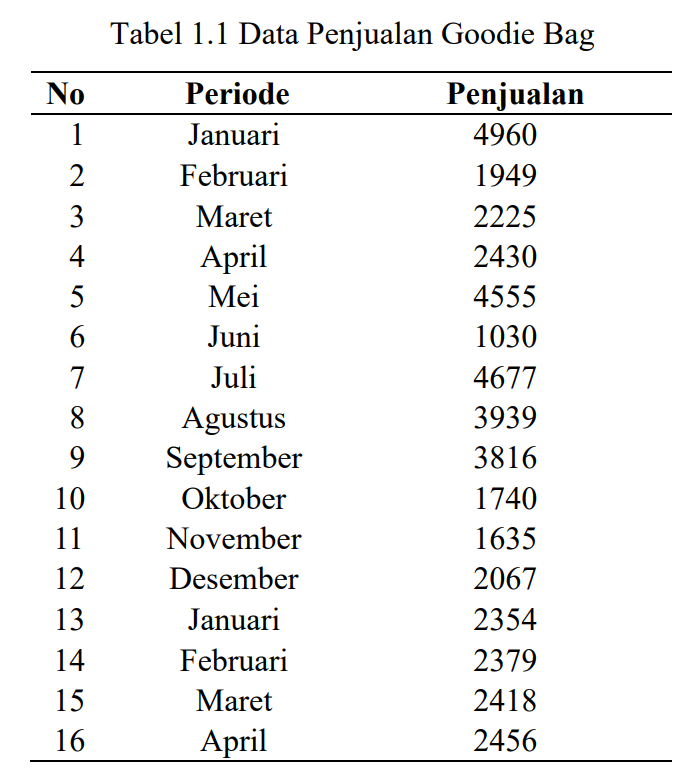





















*Berdasarkan tabel 1.1 nilai penjualan goodie bag di PT Goodiebag Custom Indonesia periode Januari 2023 - April 2024 mengalami penurunan.*























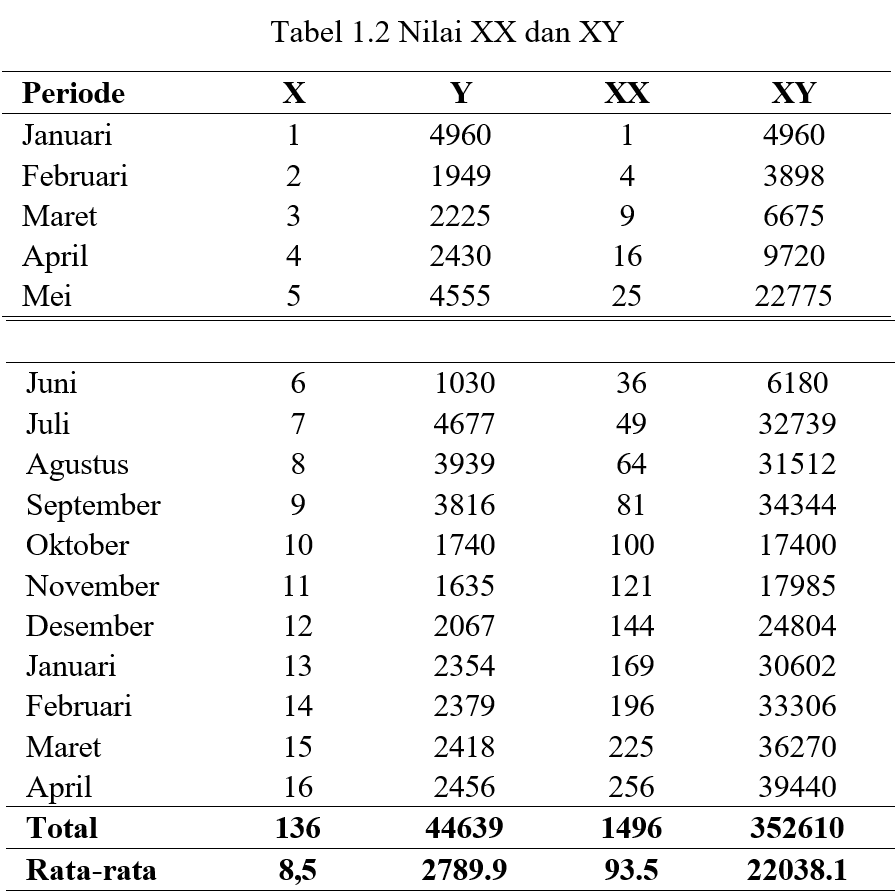

*Tabel 1.2 menunjukkaan nilai dari variabel (xx) dan variabel (xy). Variabel (xx) diperoleh berdasarkan hasil kuadrat nilai (x), sedangkan variabel (xy) diperoleh dari hasil kali antara nilai
(x) dan nilai (y).*


persamaan regresi linear: y = 3461.6 + -79.08529411764705x


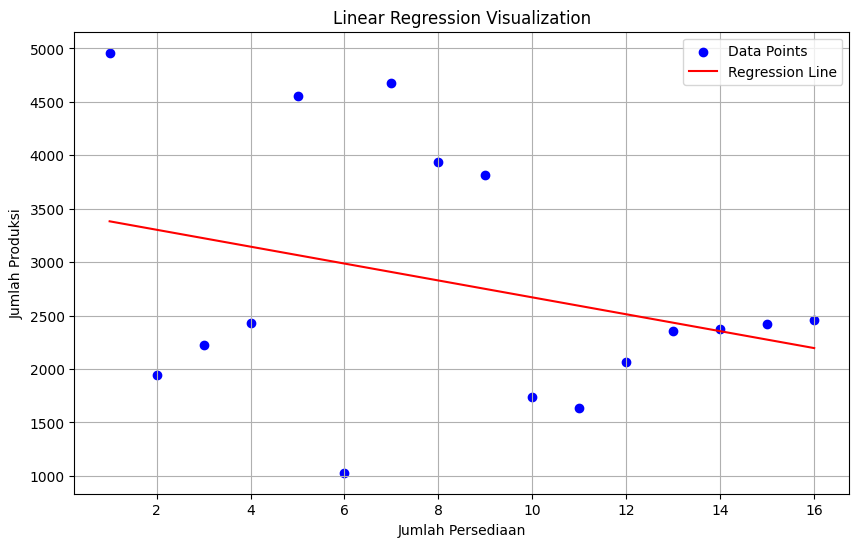

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [4960,1949,2225,2430,4555,1030,4677,3939,3816,1740,1635,2067,2354,2379,2418,2456]
m,b = regresi_linear2(x,y)
print(f"persamaan regresi linear: y = {m} + {b}x")

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
x_line = np.linspace(min(x),max(x), 200)
y_line = m + b * x_line
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel('Jumlah Persediaan')
plt.ylabel('Jumlah Produksi')
plt.title('Linear Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()

persamaan regresi linear: y = 3461.6 + -79.08529411764705x
Prediksi untuk x = 16: 2196.235294117647
Prediksi untuk x = 17: 2117.15


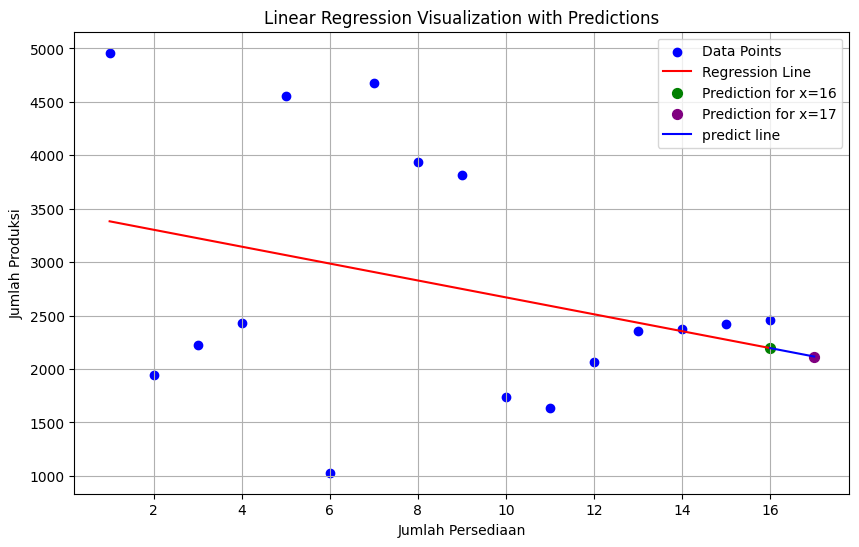

In [ ]:
def predict(x):
  return m + b * x

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [4960,1949,2225,2430,4555,1030,4677,3939,3816,1740,1635,2067,2354,2379,2418,2456]

predict_x = 16
predict_x2 = 17
predict_y = predict(predict_x)
predict_y2 = predict(predict_x2)

m,b = regresi_linear2(x,y)
print(f"persamaan regresi linear: y = {m} + {b}x")
print(f"Prediksi untuk x = {predict_x}: {predict_y}")
print(f"Prediksi untuk x = {predict_x2}: {predict_y2}")
# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
x_line = np.linspace(min(x),max(x), 200)
y_line = m + b * x_line
plt.plot(x_line, y_line, color='red', label='Regression Line')

# Prediksi dan visualisasi titik prediksi
plt.scatter(predict_x, predict_y, color='green', label=f'Prediction for x={predict_x}', s=50)
plt.scatter(predict_x2, predict_y2, color='purple', label=f'Prediction for x={predict_x2}', s=50)
predict_line = [predict_x,predict_x2]
y_predict_line = [predict_y,predict_y2]
plt.plot(predict_line,y_predict_line,color='blue',label='predict line' )

plt.xlabel('Jumlah Persediaan')
plt.ylabel('Jumlah Produksi')
plt.title('Linear Regression Visualization with Predictions')
plt.legend()
plt.grid(True)
plt.show()


**HASIL DAN PEMBAHASAN**

*Pada bagian ini akan ditampilkan hasil perhitungan yang didapatkan setelah melakukan
tahapan pada bagian metodologi menggunakan Statistical Product and Service Solution
(SPSS).*

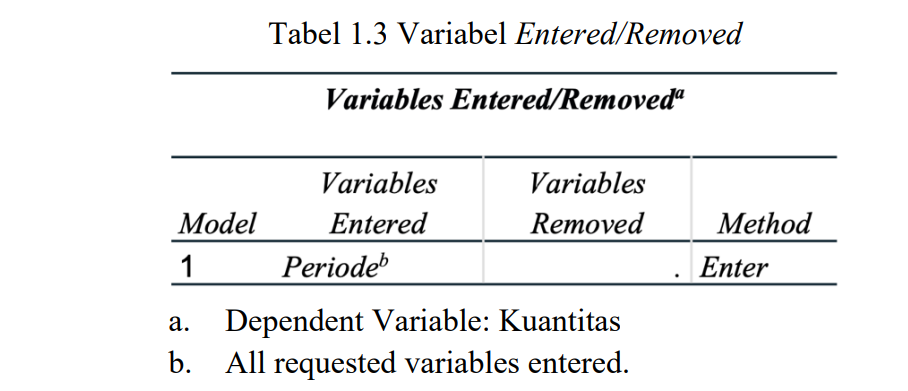

*Tabel 1.3 menunjukkan variabel yang dimasukkan serta metode yang digunakan yaitu periode
sebagai variabel independen dan kuantitas sebagai variabel dependen, dalam hal ini variabel
yang dimasukkan ke dalam model adalah fisika matematika yang menggunakan metode Enter
atau dimasukkan secara simultan/bersama.*

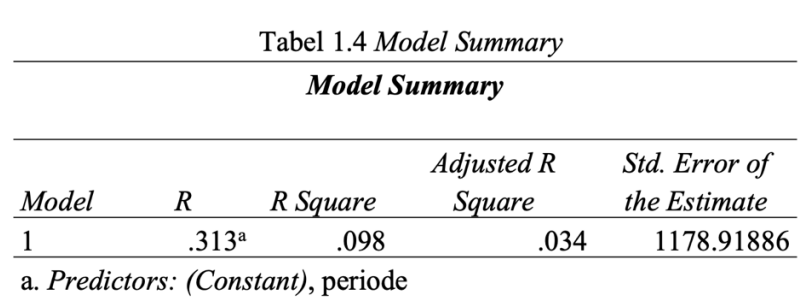

*Tabel 1.4 menjelaskan besarnya nilai korelasi atau hubungan (R) yaitu sebesar 0,313.
Hubungan tersebut memperoleh koefisien determinan (R Square) sebesar 0,098, yang mana
pengaruh variabel bebas (periode) terhadap variabel terikat (kuantitas) adalah 9,8%.*

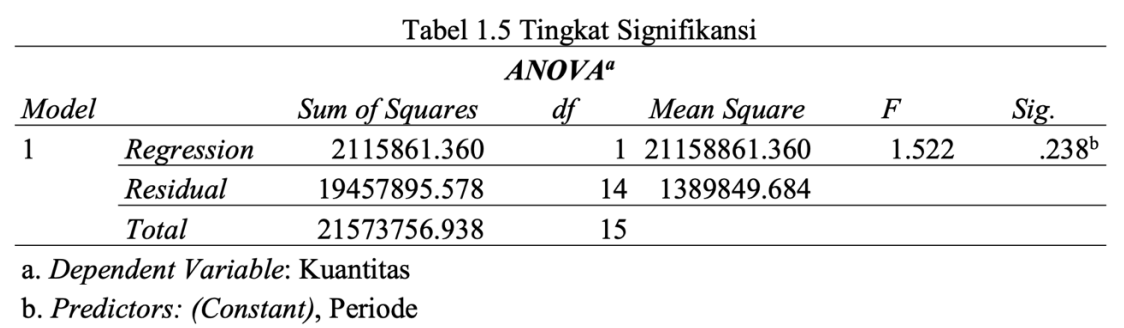

*Tabel 1.5 merupakan tabel Anova yang digunakan untuk menentukan taraf signifikansi atau
linearitas dari regresi. Pada tabel diperoleh nilai signifikansi sebesar 0,238 dengan nilai F
sebesar 1,522. Model regresi ini tidak linear, karena data dikatakan linear apabila memiliki
taraf signifikansi linearitas kurang dari 0,05.*

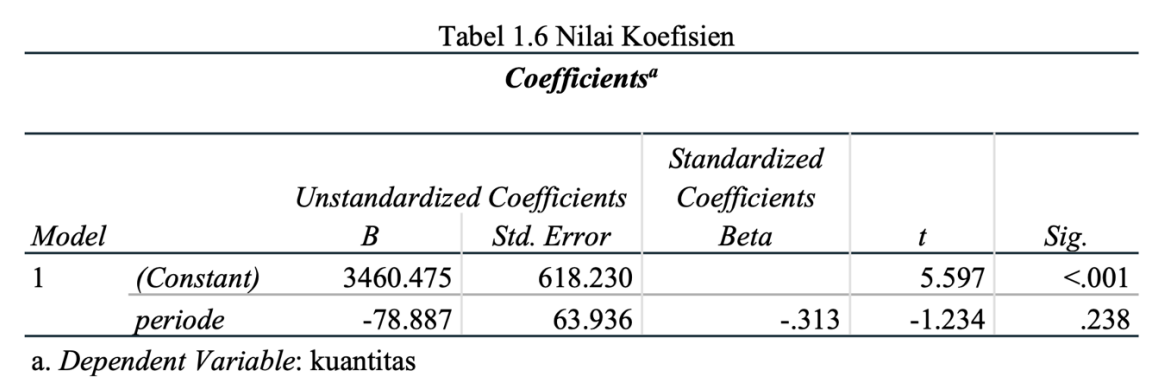

*Tabel 1.6 menjelaskan bahwa konstanta a memiliki nilai 3460,5 dan nilai konstanta b memiliki
nilai -78,887. Sehingga persamaan regresinya dapat ditulis y =− 78,887x + 3460,475.*